<a href="https://colab.research.google.com/github/AlbertChen7/nbamvppredictor/blob/main/bbmvppred_playrsscraped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [63]:
all_mvp_stats = pd.DataFrame()

year = 2022
for i in range(10):
    # Define the URLs for the MVP voting and advanced stats pages
    mvp_url = f'https://www.basketball-reference.com/awards/awards_{year}.html'
    advanced_url = f'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html'

    # Read the MVP voting page and extract the table of MVP vote getters
    mvp_table = pd.read_html(mvp_url, header=1)[0][0:5]
    mvp_table = mvp_table[['Player', 'G', 'PTS', 'TRB', 'AST', 'WS/48', 'Share']]

    # Read the advanced stats page and extract the table of player stats
    advanced_table = pd.read_html(advanced_url, attrs={'id': 'advanced_stats'})[0]
    advanced_table = advanced_table[['Player', 'PER']]

    # Merge the two tables on the 'Player' column
    mvp_stats = pd.merge(mvp_table, advanced_table, on='Player')
    
    all_mvp_stats = pd.concat([all_mvp_stats, mvp_stats])

    # Print the final table
    #print(merged_table)
    year -= 1

all_mvp_stats = all_mvp_stats[['Player', 'G', 'PTS', 'TRB', 'AST', 'PER', 'WS/48', 'Share']]
print(all_mvp_stats)
features = ['G', 'PTS', 'TRB', 'AST', 'PER', 'WS/48']
X_train = all_mvp_stats[features]
y_train = all_mvp_stats['Share']


                  Player   G   PTS   TRB   AST   PER  WS/48  Share
0           Nikola Jokić  74  27.1  13.8   7.9  32.8  0.296  0.875
1            Joel Embiid  68  30.6  11.7   4.2  31.2  0.252  0.706
2  Giannis Antetokounmpo  67  29.9  11.6   5.8  32.1  0.281  0.595
3           Devin Booker  68  26.8   5.0   4.8  21.3  0.156  0.216
4            Luka Dončić  65  28.4   9.1   8.7  25.1  0.159  0.146
0           Nikola Jokić  72  26.4  10.8   8.3  31.3  0.301  0.961
1            Joel Embiid  51  28.5  10.6   2.8  30.3  0.266  0.580
2          Stephen Curry  63  32.0   5.5   5.8  26.3  0.201  0.449
3  Giannis Antetokounmpo  61  28.1  11.0   5.9  29.2  0.244  0.345
4             Chris Paul  70  16.4   4.5   8.9  21.4  0.201  0.138
0  Giannis Antetokounmpo  63  29.5  13.6   5.6  31.9  0.279  0.952
1           LeBron James  67  25.3   7.8  10.2  25.5  0.204  0.746
2           James Harden  68  34.3   6.6   7.5  29.1  0.254  0.363
3            Luka Dončić  61  28.8   9.4   8.8  27.6  0.207  0

In [64]:
# Select season to predict on (Put final year: So if 2022-23 season, put 2023)
season = 2023

In [65]:
# Define the URL to scrape
url_base = f'https://www.basketball-reference.com/leagues/NBA_{season}_per_game.html'

# Use pandas to read in the HTML table into a dataframe
df_standard = pd.read_html(url_base)[0]

# Select only the columns you want
cols_to_keep = ['Player', 'G', 'PTS', 'TRB', 'AST']
df_base = df_standard[cols_to_keep]

url_adv = f'https://www.basketball-reference.com/leagues/NBA_{season}_advanced.html'

df_advanced = pd.read_html(url_adv)[0]

# Select only the columns you want
cols_to_keep = ['PER', 'WS/48']
df_adv = df_advanced[cols_to_keep]

playerstats = pd.concat([df_base, df_adv], axis=1)

# Check if any of the rows have the same values as the column names
col_names = playerstats.columns.tolist()
drop_indices = []
for i, row in playerstats.iterrows():
    if any(row == col_names):
        drop_indices.append(i)

# Drop the rows with repeated column names
playerstats = playerstats.drop(drop_indices)
playerstats.to_csv('output.csv', index=False)
playerstats = pd.read_csv('output.csv')
print(playerstats[features])

      G   PTS   TRB   AST   PER  WS/48
0    55   9.2   6.0   0.9  15.2  0.093
1    42   8.6  11.5   2.3  17.5  0.144
2    75  20.4   9.2   3.2  20.1  0.137
3    59   7.9   2.1   1.1   9.5  0.053
4    77   9.0   4.8   1.3  13.9  0.130
..   ..   ...   ...   ...   ...    ...
674  54   4.4   3.1   1.4  14.1  0.109
675  73  26.2   3.0  10.2  22.0  0.126
676   9   4.4   2.6   0.2  16.7  0.159
677  15   6.5   4.3   0.7  16.4  0.147
678  76  10.8   9.9   1.0  16.7  0.149

[679 rows x 6 columns]


In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(playerstats[features])
for i in range(len(y_pred)):
    if 1 > y_pred[i] >= 0:
        print('Index: %s, Player: %s, Prediction: %s' % (i, playerstats['Player'][i], y_pred[i]))

Index: 9, Player: Jarrett Allen, Prediction: 0.0012737407764700226
Index: 12, Player: Giannis Antetokounmpo, Prediction: 0.4096618953257487
Index: 92, Player: Jalen Brunson, Prediction: 0.016083966439174313
Index: 100, Player: Jimmy Butler, Prediction: 0.4108991153293331
Index: 139, Player: Stephen Curry, Prediction: 0.18398337662255337
Index: 141, Player: Anthony Davis, Prediction: 0.29335538229768177
Index: 160, Player: Luka Dončić, Prediction: 0.4369227009481491
Index: 174, Player: Kevin Durant, Prediction: 0.07590966309889091
Index: 175, Player: Kevin Durant, Prediction: 0.03602590642426473
Index: 184, Player: Joel Embiid, Prediction: 0.6342646634902065
Index: 209, Player: Shai Gilgeous-Alexander, Prediction: 0.38526005766756444
Index: 239, Player: Tyrese Haliburton, Prediction: 0.018904753350490244
Index: 245, Player: James Harden, Prediction: 0.11480344992164837
Index: 318, Player: Nikola Jokić, Prediction: 0.8668153275967068
Index: 373, Player: Damian Lillard, Prediction: 0.2826

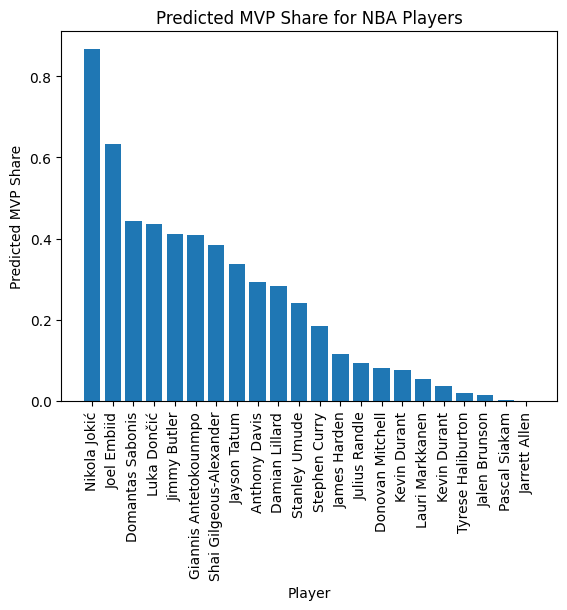

In [67]:
# Create a list of player names and their corresponding predicted values
player_predictions = []
for i in range(len(y_pred)):
    if 1 > y_pred[i] >= 0:
        player_predictions.append((playerstats['Player'][i], y_pred[i]))

#player_predictions = [(playerstats['Player'][i], y_pred[i]) for i in range(len(y_pred)) if y_pred[i] >= 0]

# Sort the list in descending order based on the predicted values
player_predictions.sort(key=lambda x: x[1], reverse=True)

# Separate the player names and predicted values into two separate lists
player_names = [x[0] for x in player_predictions]
predicted_values = [x[1] for x in player_predictions]

# Create a bar chart of the predicted values for each player
plt.bar(range(len(predicted_values)), predicted_values)

# Add the player names as x-tick labels
plt.xticks(range(len(player_names)), player_names, rotation=90)

# Add labels to the chart
plt.xlabel('Player')
plt.ylabel('Predicted MVP Share')
plt.title('Predicted MVP Share for NBA Players')

# Display the chart
plt.show()